In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('v4_종목선정(17개사순이익증가율반영).csv', encoding = 'cp949')

In [3]:
df

,회사명,거래소코드,회계년도,매출액증가율(IFRS),순이익증가율(IFRS),매출액정상영업이익률(IFRS),자기자본순이익률(IFRS),총자본순이익률(IFRS),부채비율(IFRS),차입금의존도(IFRS),자본금(*)(IFRS),* (정상)영업손익(보고서기재)(IFRS),당기순이익(손실)(IFRS),상장일
0,(주)BNK금융지주,138930,1905,58.47,94.24,67.69,1.39,1.10,26.21,NaN,1629676230,0,65221574,2011-03-30
1,(주)BNK금융지주,138930,1905,-1.67,-7.69,63.78,1.24,0.98,26.66,NaN,1629676230,0,60204223,2011-03-30
2,(주)BNK금융지주,138930,1905,43.39,75.14,77.64,2.12,1.69,24.26,NaN,1629676230,0,105438694,2011-03-30
3,(주)BNK금융지주,138930,1905,102.40,129.61,88.23,4.65,3.72,25.67,NaN,1629676230,0,242096740,2011-03-30
4,(주)CMG제약,58820,1905,22.67,46.10,5.50,2.35,2.12,12.65,0.00,54443622,1323711,2391366,2001-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,신성통상(주),5390,1905,17.54,559.25,7.01,12.21,3.45,242.52,128.42,"71,854,195","84,084,206","29,430,004",1975-12-05
8155,한국주철관공업(주),970,1905,-9.95,3.06,4.39,1.52,1.28,14.88,2.30,"12,000,000","2,552,676","3,327,881",1969-12-12
8156,한국주철관공업(주),970,1905,-9.66,317.72,6.38,6.23,5.35,17.80,0.90,"12,000,000","3,348,595","13,901,378",1969-12-12
8157,효성오앤비(주),97870,1905,6.62,7.08,6.17,2.46,2.19,15.68,3.94,"4,245,000","1,777,583","1,483,555",2008-04-08


## 칼럼명
* 회사명 = company_name
* 종목코드   = ticker
* 회계년도 = fiscal_year
* 매출액증가율(IFRS) = sales_growth_rate
* 순이익증가율(IFRS) = net_profit_growth_rate   
* 매출액정상영업이익률(IFRS) = operating_profit_rate 
* 자기자본순이익률(IFRS) = roe   
* 총자본순이익률(IFRS)   = roa
* 부채비율(IFRS) = debt_ratio
* 차입금의존도(IFRS) = tbp(Total Borrowings And Bonds Payable to Total Assets)
* 자본금(*)(IFRS) = equity_capital
* (정상)영업손익(보고서기재)(IFRS) = operating_profit
* 당기순이익(손실)(IFRS) = net_profit   
* 상장일 = listing_date


In [4]:
#칼럼 이름 바꾸기
df.rename(columns = {"회사명":"company_name","거래소코드":"ticker","회계년도":"fiscal_year","매출액증가율(IFRS)":"sales_growth_rate",
                     "순이익증가율(IFRS)":"net_profit_growth_rate","매출액정상영업이익률(IFRS)": "operating_profit_rate",
                     "자기자본순이익률(IFRS)":"roe","총자본순이익률(IFRS)":"roa","부채비율(IFRS)":"debt_ratio",
                     "차입금의존도(IFRS)":"tbp","총자본회전률(IFRS)":"equity_capital","자본금(*)(IFRS)":"equity_capital","* (정상)영업손익(보고서기재)(IFRS)":"operating_profit",
                     "당기순이익(손실)(IFRS)":"net_profit","상장일":"listing_date"}, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_name            8159 non-null   object 
 1   ticker                  8159 non-null   int64  
 2   fiscal_year             8159 non-null   int64  
 3   sales_growth_rate       7746 non-null   float64
 4   net_profit_growth_rate  7746 non-null   float64
 5   operating_profit_rate   7746 non-null   float64
 6   roe                     7746 non-null   float64
 7   roa                     7746 non-null   float64
 8   debt_ratio              7746 non-null   float64
 9   tbp                     7431 non-null   float64
 10  equity_capital          8108 non-null   object 
 11  operating_profit        7865 non-null   object 
 12  net_profit              8104 non-null   object 
 13  listing_date            8159 non-null   object 
dtypes: float64(7), int64(2), object(5)
memor

In [6]:
## 회계년도 19년 이전 삭제
df['fiscal_year'] = df['fiscal_year'].astype(int)
df_c = df[df['fiscal_year'] > 2019]

In [7]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,listing_date


In [8]:
#상장일 20200601 작은거 삭제 상장일 제거
df_c['listing_date'] = df_c['listing_date'].str.replace('-','')
df_c['listing_date'] = df_c['listing_date'].astype(int)
df_c = df_c[df_c['listing_date'] < 20190101]

In [9]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit,listing_date


In [10]:
df_c = df_c.drop("listing_date",axis=1)

In [11]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_name            0 non-null      object 
 1   ticker                  0 non-null      int64  
 2   fiscal_year             0 non-null      int32  
 3   sales_growth_rate       0 non-null      float64
 4   net_profit_growth_rate  0 non-null      float64
 5   operating_profit_rate   0 non-null      float64
 6   roe                     0 non-null      float64
 7   roa                     0 non-null      float64
 8   debt_ratio              0 non-null      float64
 9   tbp                     0 non-null      float64
 10  equity_capital          0 non-null      object 
 11  operating_profit        0 non-null      object 
 12  net_profit              0 non-null      object 
dtypes: float64(7), int32(1), int64(1), object(4)
memory usage: 0.0+ bytes


In [12]:
# 스팩주 삭제
df_c = df_c.drop(df_c[df_c['company_name'].str.contains('기업인수목적')].index, axis=0)

In [13]:
# 스팩주 없는지 확인
df_c[df_c['company_name'].str.contains('기업인수목적')]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit


In [14]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit


In [15]:
# tbp 차입금의존도 na -> 0 
df_c['tbp']= df_c['tbp'].fillna(0.0)

In [16]:
# sales_growth_rate 빈 값들 삭제
df_c = df_c.drop(df_c[df_c['sales_growth_rate'].isnull()].index,axis=0)

In [17]:
df_c[df_c['sales_growth_rate'].isnull()]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit


In [18]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit


In [19]:
# 순이익증가율 2021 기중 - 삭제
# df_ccc = df_c[df_c['net_profit'] < 0]

In [20]:
# df_ccc

In [21]:
# df_c =df_c.drop(['level_0','index'],axis=1)

In [23]:
# 회사명 리스트뽑기
Enterprise_list = df_c['company_name'].unique()

In [24]:
Enterprise_list

array([], dtype=object)

In [364]:
############################# 테스트

In [365]:
################################################################################

In [332]:
df_c[df_c['sales_growth_rate'].isnull()]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit


In [333]:
df_c[df_c['operating_profit'].isnull()]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit


In [334]:
df_c =df_c.reset_index()

In [335]:
df_c =df_c.drop(['index'],axis=1)

In [336]:
df_c

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,operating_profit,net_profit


In [338]:
# 20, 21 년 데이터 하나라도 없는 회사는 삭제
del_Enterprise = []
for ename in Enterprise_list:
    compare_y = df_c[df_c['company_name'] == ename ]
    print(compare_y.shape)
    if compare_y.shape == (1,13):
        del_Enterprise.append(ename)

In [339]:
del_Enterprise

[]

In [223]:
for dename in del_Enterprise:
    df_c = df_c.drop(df_c[df_c['company_name'] == dename ].index, axis=0)

In [224]:
df_c =df_c.reset_index()

In [225]:
# 다시 회사명 리스트뽑기
Enterprise_list = df_c['company_name'].unique()

In [226]:
len(Enterprise_list)

1898

In [227]:
Enterprise_list[50]

'(주)나노'

In [228]:
df_c[df_c['company_name'] == '(주)남성' ]

,index,level_0,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,operating_profit,net_profit,equity_capital
120,120,120,(주)남성,4270,2020,-25.14,0.0,0.69,-1.42,-0.71,99.99,34.19,157632.0,-1211402.0,18106080.0
121,121,121,(주)남성,4270,2021,29.43,0.0,4.58,3.93,1.94,105.89,32.16,1347265.0,3158905.0,18106080.0


In [229]:
df_ce = pd.DataFrame()
for ename in Enterprise_list: #45 245
    compare_y = df_c[df_c['company_name'] == ename ]
    # 매출액 sales_growth_rate
    sgr = compare_y[compare_y['fiscal_year'] == 2021]['sales_growth_rate'].values
 
    # 순이익 net_profit_growth_rate
    npgr =compare_y[compare_y['fiscal_year'] == 2021]['net_profit_growth_rate'].values

    # 매출액정상영업이익률 operating_profit_rate 
    opr = ((compare_y[compare_y['fiscal_year'] == 2021]['operating_profit_rate'].values) - 
         (compare_y[compare_y['fiscal_year'] == 2020]['operating_profit_rate'].values ))

    #자기자본순이익률 roe  
    roe =((compare_y[compare_y['fiscal_year'] == 2021]['roe'].values) - 
        (compare_y[compare_y['fiscal_year'] == 2020]['roe'].values) )
 
    #총자본순이익률 roa    
    roa = ((compare_y[compare_y['fiscal_year'] == 2021]['roa'].values) - 
        (compare_y[compare_y['fiscal_year'] == 2020]['roa'].values))
   
    #부채비율 debt_ratio    
    d_r = ((compare_y[compare_y['fiscal_year'] == 2021]['debt_ratio'].values) - 
        (compare_y[compare_y['fiscal_year'] == 2020]['debt_ratio'].values) )
    
    #차입금의존도 tbp
    tbp = ((compare_y[compare_y['fiscal_year'] == 2021]['tbp'].values) - 
        (compare_y[compare_y['fiscal_year'] == 2020]['tbp'].values) )
        
    # 자본금  equity_capital
    e_c = ((compare_y[compare_y['fiscal_year'] == 2021]['equity_capital'].values) - 
        (compare_y[compare_y['fiscal_year'] == 2020]['equity_capital'].values) )
    
    df_ce = df_ce.append({'company_name': compare_y['company_name'].values[0],'ticker': compare_y['ticker'].values[0] ,'fiscal_year': 1.0,
                  'sales_growth_rate': sgr[0] ,'net_profit_growth_rate': npgr[0],'operating_profit_rate': opr[0],
                  'roe': roe[0],'roa': roa[0],'debt_ratio': d_r[0],'tbp': tbp[0],'equity_capital': e_c[0]}, ignore_index=True )
    

In [230]:
df_ce

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital
0,(주)BNK금융지주,138930.0,1.0,102.40,129.61,10.59,2.53,2.03,1.41,0.00,0.0
1,(주)CMG제약,58820.0,1.0,8.55,-41.78,-0.14,-0.79,-0.70,-1.30,-0.01,0.0
2,(주)DB하이텍,990.0,1.0,10.90,-2.64,-2.94,-3.53,-0.77,-11.20,-2.73,0.0
3,(주)ES큐브,50120.0,1.0,20.18,0.00,3.04,42.22,18.31,-253.94,-37.77,26172463.0
4,(주)JB금융지주,175330.0,1.0,52.23,60.93,4.92,2.38,1.55,-5.41,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1893,휴젤(주),145020.0,1.0,37.43,78.78,15.09,1.51,1.23,-5.46,0.14,4082845.0
1894,휴켐스(주),69260.0,1.0,28.02,33.65,-1.55,1.58,1.33,4.97,0.12,0.0
1895,흥구석유(주),24060.0,1.0,15.22,-60.42,-0.50,-0.36,-0.33,-2.56,-0.05,0.0
1896,흥국화재해상보험(주),540.0,1.0,4.34,104.84,0.62,2.00,0.10,174.61,0.00,0.0


In [231]:
df_ce['ticker'] = df_ce['ticker'].astype(int)

In [232]:
df_ce['ticker'] = df_ce['ticker'].astype(str)

In [233]:
df_ce

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital
0,(주)BNK금융지주,138930,1.0,102.40,129.61,10.59,2.53,2.03,1.41,0.00,0.0
1,(주)CMG제약,58820,1.0,8.55,-41.78,-0.14,-0.79,-0.70,-1.30,-0.01,0.0
2,(주)DB하이텍,990,1.0,10.90,-2.64,-2.94,-3.53,-0.77,-11.20,-2.73,0.0
3,(주)ES큐브,50120,1.0,20.18,0.00,3.04,42.22,18.31,-253.94,-37.77,26172463.0
4,(주)JB금융지주,175330,1.0,52.23,60.93,4.92,2.38,1.55,-5.41,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1893,휴젤(주),145020,1.0,37.43,78.78,15.09,1.51,1.23,-5.46,0.14,4082845.0
1894,휴켐스(주),69260,1.0,28.02,33.65,-1.55,1.58,1.33,4.97,0.12,0.0
1895,흥구석유(주),24060,1.0,15.22,-60.42,-0.50,-0.36,-0.33,-2.56,-0.05,0.0
1896,흥국화재해상보험(주),540,1.0,4.34,104.84,0.62,2.00,0.10,174.61,0.00,0.0


In [234]:
df_ce[df_ce['company_name'].str.contains('메디콕스')]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital


In [235]:
df_ce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_name            1898 non-null   object 
 1   ticker                  1898 non-null   object 
 2   fiscal_year             1898 non-null   float64
 3   sales_growth_rate       1898 non-null   float64
 4   net_profit_growth_rate  1898 non-null   float64
 5   operating_profit_rate   1898 non-null   float64
 6   roe                     1898 non-null   float64
 7   roa                     1898 non-null   float64
 8   debt_ratio              1898 non-null   float64
 9   tbp                     1898 non-null   float64
 10  equity_capital          1898 non-null   float64
dtypes: float64(9), object(2)
memory usage: 163.2+ KB


In [236]:
# 시가총액 자르기
market_df = pd.read_csv('전종목시세_20210630.csv', encoding = 'cp949')

In [237]:
market_df

,종목코드,종목명,시가총액
0,060310,3S,"141,822,187,345"
1,095570,AJ네트웍스,"284,679,553,600"
2,006840,AK홀딩스,"431,870,488,600"
3,054620,APS홀딩스,"322,228,691,800"
4,265520,AP시스템,"459,747,207,250"
...,...,...,...
2568,000547,흥국화재2우B,"4,869,120,000"
2569,000545,흥국화재우,"8,678,400,000"
2570,003280,흥아해운,"30,117,000,222"
2571,037440,희림,"113,746,620,750"


In [238]:
market_df['시가총액'] = market_df['시가총액'].str.replace(',','')
market_df['시가총액'] = market_df['시가총액'].astype('float64') / 1000000.0 # 너무 커 100만 단위로 변경
market_df =  market_df[market_df['시가총액'] < 20000.0]

In [239]:
market_df

,종목코드,종목명,시가총액
18,011155,CJ씨푸드1우,8800.0000
30,367340,DB금융스팩8호,12826.0000
31,367360,DB금융스팩9호,10236.6000
35,000995,DB하이텍1우,13646.3940
76,335870,IBKS제12호스팩,6864.0000
...,...,...,...
2464,340440,한화플러스제1호스팩,10102.9500
2489,004565,현대비앤지스틸우,10457.9104
2555,212310,휴벡셀,13669.1834
2568,000547,흥국화재2우B,4869.1200


In [240]:
del_list = market_df['종목명'].values

In [241]:
del_list

array(['CJ씨푸드1우', 'DB금융스팩8호', 'DB금융스팩9호', 'DB하이텍1우', 'IBKS제12호스팩',
       'IBKS제13호스팩', 'IBKS제14호스팩', 'IBKS제15호스팩', 'JW중외제약2우B', 'JW중외제약우',
       'KG동부제철우', 'NPC우', 'SK4호스팩', 'SK5호스팩', 'SK6호스팩', 'SK네트웍스우',
       'SK증권우', 'UCI', '계양전기우', '골프존데카', '교보10호스팩', '교보9호스팩', '금강공업우',
       '금호건설우', '깨끗한나라우', '나눔테크', '나라소프트', '남선알미우', '넥센우', '노루페인트우',
       '노루홀딩스우', '다이오진', '대덕1우', '대동고려삼', '대상홀딩스우', '대신밸런스제7호스팩',
       '대신밸런스제8호스팩', '대신밸런스제9호스팩', '대원전선우', '대주이엔티', '대호특수강우', '데이드림엔터',
       '동부건설우', '동양2우B', '동양3우B', '동양우', '동원시스템즈우', '라이프사이언스테크놀로지', '럭슬',
       '렌딩머신', '루트로닉3우C', '메디젠휴먼케어', '명진홀딩스', '미래에셋대우스팩 5호', '미래에셋대우스팩3호',
       '미래엔에듀파트너', '미애부', '바이오시네틱스', '바이오프로테크', '볼빅', '비엔디생활건강', '빅텐츠',
       '뿌리깊은나무들', '삼양사우', '상상인이안1호스팩', '상상인이안제2호스팩', '서울식품우', '성문전자우',
       '성신양회우', '소리바다', '소프트센우', '수프로', '스카이문스테크놀로지', '스타모빌리티', '신영스팩5호',
       '신영스팩6호', '신원우', '신한제6호스팩', '신한제7호스팩', '썬테크', '씨알푸드', '씨앤에스링크',
       '아리온', '아이케이세미콘', '아이피몬스터', '앙츠', '에스디시스템', '에스알바이오텍', '에스앤더블류',
     

In [242]:
for i in del_list:
    df_ce = df_ce.drop(df_ce[df_ce['company_name'].str.contains(i)].index , axis=0)

In [243]:
df_ce

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital
0,(주)BNK금융지주,138930,1.0,102.40,129.61,10.59,2.53,2.03,1.41,0.00,0.0
1,(주)CMG제약,58820,1.0,8.55,-41.78,-0.14,-0.79,-0.70,-1.30,-0.01,0.0
2,(주)DB하이텍,990,1.0,10.90,-2.64,-2.94,-3.53,-0.77,-11.20,-2.73,0.0
3,(주)ES큐브,50120,1.0,20.18,0.00,3.04,42.22,18.31,-253.94,-37.77,26172463.0
4,(주)JB금융지주,175330,1.0,52.23,60.93,4.92,2.38,1.55,-5.41,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1893,휴젤(주),145020,1.0,37.43,78.78,15.09,1.51,1.23,-5.46,0.14,4082845.0
1894,휴켐스(주),69260,1.0,28.02,33.65,-1.55,1.58,1.33,4.97,0.12,0.0
1895,흥구석유(주),24060,1.0,15.22,-60.42,-0.50,-0.36,-0.33,-2.56,-0.05,0.0
1896,흥국화재해상보험(주),540,1.0,4.34,104.84,0.62,2.00,0.10,174.61,0.00,0.0


In [244]:
# csv 파일확인
df11 = pd.read_csv('Close_ratio.csv', encoding = 'cp949')

In [245]:
df11.columns

Index(['Unnamed: 0', 'Code', 'Close_ratio'], dtype='object')

In [246]:
df11 = df11.rename(columns= {'Code':'ticker'})

In [247]:
# df11.reset_index()
# df11 =df11.drop(['Unnamed: 0','index'],axis=1)
df11 =df11.drop(['Unnamed: 0'],axis=1)

In [248]:
# null 값 확인
df_12 = df11[df11['Close_ratio'].isnull()]

In [251]:
df_12

,ticker,Close_ratio
133,042670,NaN
212,020560,NaN
253,028150,NaN
350,003620,NaN
392,023890,NaN
...,...,...
2329,140660,NaN
2336,179720,NaN
2337,225860,NaN
2339,208890,NaN


In [252]:
df11

,ticker,Close_ratio
0,005930,-15.383109
1,000660,-17.706711
2,207940,-62.512793
3,035420,-12.781179
4,068270,-96.644307
...,...,...
2338,001529,18.272418
2339,208890,NaN
2340,238500,87.493545
2341,267810,NaN


In [253]:
# df_12.to_csv('df_12.csv', sep=',', na_rep='NaN',encoding="utf-8-sig")

In [254]:
# df11.rename(columns = {'종목코드':'ticker','증가율' : 'stock_price_rate'}, inplace = True)

In [256]:
merge_sp_rate = pd.merge(df_ce,df11, how='left',on='ticker')

In [267]:
set(df_ce['ticker'].unique()) - set(df11['ticker'].unique())

{'37030',
 '36830',
 '49480',
 '10240',
 '25820',
 '52670',
 '37270',
 '7980',
 '35250',
 '12690',
 '39440',
 '180',
 '66970',
 '85310',
 '53290',
 '39740',
 '99220',
 '73570',
 '10130',
 '78000',
 '65150',
 '10060',
 '86900',
 '60900',
 '309930',
 '20180',
 '98660',
 '520',
 '90460',
 '6890',
 '25950',
 '3220',
 '9290',
 '9150',
 '15590',
 '60280',
 '44480',
 '1380',
 '2810',
 '1740',
 '2990',
 '45660',
 '1800',
 '66130',
 '37560',
 '46940',
 '5950',
 '66670',
 '50890',
 '17480',
 '950',
 '93920',
 '35760',
 '60310',
 '7330',
 '37070',
 '650',
 '16920',
 '6390',
 '78930',
 '10170',
 '52400',
 '41520',
 '79000',
 '43370',
 '23000',
 '47080',
 '69640',
 '2680',
 '46390',
 '89150',
 '66570',
 '35600',
 '23160',
 '36640',
 '33640',
 '79960',
 '54050',
 '59120',
 '60240',
 '53160',
 '11070',
 '11330',
 '95700',
 '84370',
 '5830',
 '2380',
 '4060',
 '6140',
 '91120',
 '35810',
 '65770',
 '95610',
 '1570',
 '57680',
 '83550',
 '39030',
 '4700',
 '71840',
 '5990',
 '23800',
 '70',
 '44780',
 

In [257]:
merge_sp_rate

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,Close_ratio
0,(주)BNK금융지주,138930,1.0,102.40,129.61,10.59,2.53,2.03,1.41,0.00,0.0,-14.070241
1,(주)CMG제약,58820,1.0,8.55,-41.78,-0.14,-0.79,-0.70,-1.30,-0.01,0.0,NaN
2,(주)DB하이텍,990,1.0,10.90,-2.64,-2.94,-3.53,-0.77,-11.20,-2.73,0.0,NaN
3,(주)ES큐브,50120,1.0,20.18,0.00,3.04,42.22,18.31,-253.94,-37.77,26172463.0,NaN
4,(주)JB금융지주,175330,1.0,52.23,60.93,4.92,2.38,1.55,-5.41,0.00,0.0,-11.010795
...,...,...,...,...,...,...,...,...,...,...,...,...
1893,휴젤(주),145020,1.0,37.43,78.78,15.09,1.51,1.23,-5.46,0.14,4082845.0,-20.324093
1894,휴켐스(주),69260,1.0,28.02,33.65,-1.55,1.58,1.33,4.97,0.12,0.0,NaN
1895,흥구석유(주),24060,1.0,15.22,-60.42,-0.50,-0.36,-0.33,-2.56,-0.05,0.0,NaN
1896,흥국화재해상보험(주),540,1.0,4.34,104.84,0.62,2.00,0.10,174.61,0.00,0.0,NaN


In [258]:
merge_sp_rate1=merge_sp_rate[merge_sp_rate['Close_ratio'].isnull()]

In [266]:
merge_sp_rate1

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,Close_ratio
1,(주)CMG제약,58820,1.0,8.55,-41.78,-0.14,-0.79,-0.70,-1.30,-0.01,0.0,NaN
2,(주)DB하이텍,990,1.0,10.90,-2.64,-2.94,-3.53,-0.77,-11.20,-2.73,0.0,NaN
3,(주)ES큐브,50120,1.0,20.18,0.00,3.04,42.22,18.31,-253.94,-37.77,26172463.0,NaN
6,(주)MH에탄올,23150,1.0,-15.14,0.90,0.26,0.46,0.18,3.43,-0.59,0.0,NaN
7,(주)SH에너지화학,2360,1.0,37.05,0.00,13.65,5.51,4.47,4.02,1.62,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1891,휴림로봇(주),90710,1.0,39.25,0.00,23.17,-41.48,-25.10,-68.01,-18.65,7182197.0,NaN
1894,휴켐스(주),69260,1.0,28.02,33.65,-1.55,1.58,1.33,4.97,0.12,0.0,NaN
1895,흥구석유(주),24060,1.0,15.22,-60.42,-0.50,-0.36,-0.33,-2.56,-0.05,0.0,NaN
1896,흥국화재해상보험(주),540,1.0,4.34,104.84,0.62,2.00,0.10,174.61,0.00,0.0,NaN


In [265]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       2343 non-null   object 
 1   Close_ratio  2267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 36.7+ KB


In [260]:
merge_sp_rate1[merge_sp_rate1['ticker']==1]

,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital,Close_ratio


In [261]:
merge_sp_rate1.to_csv('merge_sp_rate.csv', sep=',', na_rep='NaN',encoding="utf-8-sig") # na_rep='NaN' 결측값 표시

In [ ]:
# sales_growth_rate 높은 순으로 정렬 df_plot 그리는 용도로
df_plot = df_ce.sort_values(by='sales_growth_rate', ascending=False) 

In [414]:
df_plot = df_plot.reset_index()

In [415]:
df_plot.describe()

,index,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital
count,1898.000000,1898.000000,1898.0,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1.898000e+03
mean,948.500000,81411.759747,1.0,55.157334,176.792787,-23.805616,1.445495,1.121949,7.910005,-0.981660,2.482969e+06
std,548.049724,86752.473792,0.0,1221.430752,1710.370780,2059.188064,20.477449,11.241840,292.136808,8.627851,4.392292e+07
min,0.000000,20.000000,1.0,-99.770000,-99.550000,-64662.880000,-468.030000,-71.970000,-1658.660000,-69.770000,-7.441176e+08
25%,474.250000,15752.500000,1.0,-5.622500,0.000000,-3.107500,-1.765000,-1.090000,-11.392500,-3.805000,0.000000e+00
50%,948.500000,53520.000000,1.0,9.660000,0.000000,0.730000,0.780000,0.470000,-0.050000,-0.190000,0.000000e+00
75%,1422.750000,111755.000000,1.0,28.805000,45.940000,5.557500,4.630000,2.627500,9.285000,1.407500,4.165412e+05
max,1897.000000,950170.000000,1.0,52476.330000,56335.640000,53255.360000,430.030000,368.000000,10972.790000,47.150000,1.264881e+09


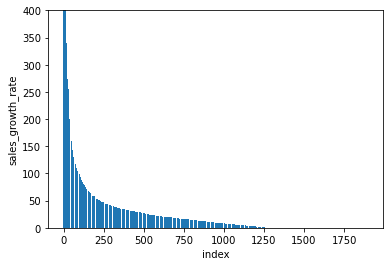

In [416]:
import matplotlib.pyplot as plt
plt.cla() # plt 초기화
plt.bar(df_plot.index.values, df_plot['sales_growth_rate'].values)
# plt.hist(df_plot['sales_growth_rate'].values, bins = 20)
plt.xlabel('index')
plt.ylabel('sales_growth_rate')
plt.ylim(0,400)  # Y축의 범위
plt.show()

In [417]:
# net_profit_growth_rate 높은 순으로 정렬
df_plot = df_ce.sort_values(by='net_profit_growth_rate', ascending=False) 
df_plot = df_plot.reset_index()

In [418]:
df_plot

,index,company_name,ticker,fiscal_year,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital
0,1353,부국철강(주),26940.0,1.0,49.26,56335.64,5.65,5.03,4.41,8.06,0.00,0.0
1,397,(주)솔본,35610.0,1.0,10.79,30495.19,-12.47,12.28,12.06,0.13,0.00,0.0
2,1407,상신이디피(주),91580.0,1.0,42.62,27761.21,5.82,6.86,3.19,-26.65,-11.64,334088.0
3,125,(주)대창,12800.0,1.0,58.44,11804.72,4.70,4.64,1.77,25.05,1.60,0.0
4,1055,(주)한국전자홀딩스,6200.0,1.0,246.39,9291.18,76.06,4.21,4.10,0.35,-0.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1389,삼영이엔씨(주),65570.0,1.0,-15.65,-96.37,-12.14,-0.58,-0.46,-1.48,-0.25,398801.0
1894,1448,신원종합개발(주),17000.0,1.0,-10.35,-96.89,-0.68,-2.65,-1.27,5.64,-6.47,6000000.0
1895,23,(주)경보제약,214390.0,1.0,-19.86,-97.97,-5.84,-4.27,-2.63,-8.81,-0.27,0.0
1896,996,(주)파커스,65690.0,1.0,-7.40,-98.02,-15.65,-1.95,-1.64,52.16,27.30,42911.0


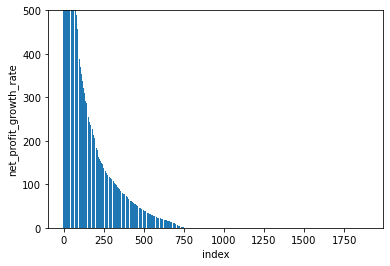

In [419]:
plt.cla()
plt.bar(df_plot.index.values, df_plot['net_profit_growth_rate'].values)
plt.xlabel('index')
plt.ylabel('net_profit_growth_rate')
plt.ylim(0,500)  # Y축의 범위
plt.show()

In [420]:
len(df_ce.index)

1898

In [421]:
# 점수 매기기
df_ce_num=pd.DataFrame()
for i in range(len(df_ce.index)):
    ce_num =df_ce[df_ce.index==i]
    
    # 매출액 sales_growth_rate
    if ce_num["sales_growth_rate"].values > 0:
        sgr = 2
    elif ce_num["sales_growth_rate"].values == 0:
        sgr = 1
    else :
        sgr = 0
    # 순이익 net_profit_growth_rate
    if ce_num["net_profit_growth_rate"].values > 0:
        npgr = 2
    elif ce_num["net_profit_growth_rate"].values == 0:
        npgr = 1
    else :
        npgr = 0
        
    # 매출액정상영업이익률 operating_profit_rate
    if ce_num["operating_profit_rate"].values > 0:
        opr = 2
    elif ce_num["operating_profit_rate"].values == 0:
        opr = 1
    else :
        opr = 0 
        
    #자기자본순이익률 roe 
    if ce_num["roe"].values > 0:
        roe = 2
    elif ce_num["roe"].values == 0:
        roe = 1
    else :
        roe = 0
        
    #총자본순이익률 roa
    if ce_num["roa"].values > 0:
        roa = 2
    elif ce_num["roa"].values == 0:
        roa = 1
    else :
        roa = 0
            
    #부채비율 debt_ratio 
    if ce_num["debt_ratio"].values > 0:
        d_r = 0
    elif ce_num["debt_ratio"].values == 0:
        d_r = 1
    else :
        d_r = 2
              
    #차입금의존도 tbp
    if ce_num["tbp"].values > 0:
        tbp = 2
    elif ce_num["tbp"].values == 0:
        tbp = 1
    else :
        tbp = 0
    
    # 자본금  equity_capital
    if ce_num["equity_capital"].values > 0:
        e_c = 2
    elif ce_num["equity_capital"].values == 0:
        e_c = 1
    else :
        e_c = 0
    

    df_ce_num = df_ce_num.append({'company_name': ce_num['company_name'].values[0],'ticker': ce_num['ticker'].values[0] ,
                  'sales_growth_rate': sgr ,'net_profit_growth_rate': npgr,'operating_profit_rate': opr,
                  'roe': roe,'roa': roa,'debt_ratio': d_r,'tbp': tbp,'equity_capital': e_c}, ignore_index=True )

In [422]:
df_ce_num

,company_name,ticker,sales_growth_rate,net_profit_growth_rate,operating_profit_rate,roe,roa,debt_ratio,tbp,equity_capital
0,(주)BNK금융지주,138930.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0
1,(주)CMG제약,58820.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
2,(주)DB하이텍,990.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
3,(주)ES큐브,50120.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0
4,(주)JB금융지주,175330.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1893,휴젤(주),145020.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1894,휴켐스(주),69260.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,1.0
1895,흥구석유(주),24060.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
1896,흥국화재해상보험(주),540.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0


In [423]:
df_ce_num_hm= df_ce_num[['sales_growth_rate','net_profit_growth_rate','operating_profit_rate',
                        'roe','roa','debt_ratio','tbp','equity_capital']]

<AxesSubplot:>

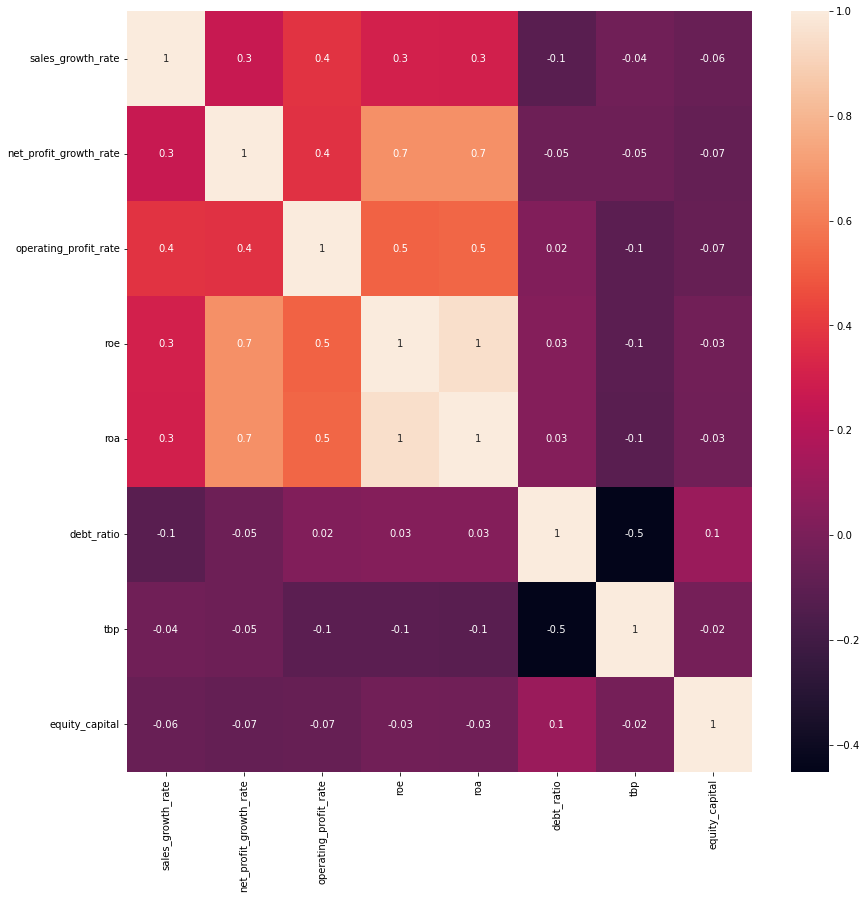

In [424]:
corr = df_ce_num_hm.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True, fmt='.1g')